In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

In [2]:
def transform_to_poly(x, degree=5):
    x_poly = np.zeros((x.shape[0], degree))
    for j in range(degree):
        x_poly[:,j] = x ** (j+1)
    return x_poly

def make_quadratic_data():
    np.random.seed(0)
    x = np.linspace(0, 2, 100)
    x_train = x.reshape(-1,1)
    y_train = x ** 2 + 0.3 * (np.random.random_sample(x.shape[0]) - 0.5)
    return x, x_train, y_train

x, x_train, y_train = make_quadratic_data()

Coef : [1.9624822]


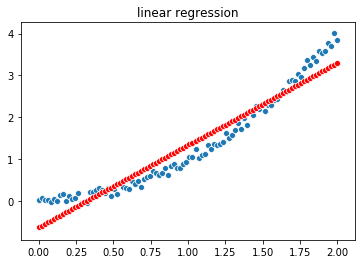

In [3]:
def train_model(x, x_train, y_train, model, title):
    model.fit(x_train, y_train)    
    y_pred = model.predict(x_train)

    print(f'Coef : {model.coef_}')

    p = sns.scatterplot(x, y_train)
    p = sns.scatterplot(x, y_pred, color='red')
    plt.title(title)
    p = p.get_figure()
    return p 

model = LinearRegression()
title = 'linear regression'
p = train_model(x, x_train, y_train, model, title)

Coef : [-0.08212841  1.0223053 ]


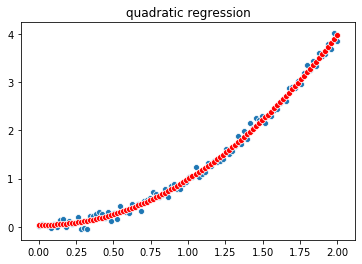

In [4]:
x_train2 = transform_to_poly(x, degree=2)
model = LinearRegression()
title = 'quadratic regression'

p = train_model(x, x_train2, y_train, model, title)

In [5]:
def make_noisy_linear_data(a=0.5, b=2, n_data=8):
    np.random.seed(6)
    x = np.random.random_sample(n_data)    
    y_train = a * x + b + 0.2 * (np.random.random_sample(n_data) - 0.5)
    return x, y_train

x, y_train = make_noisy_linear_data()

In [6]:
def train_overfitted_model(x, y_train, model, prefix, max_degree=6):
    figures = []
    for d in range(1, max_degree + 1):
        title = f'{prefix}, d={d}'

        x_train = transform_to_poly(x, d)
        model.fit(x_train, y_train)

        print(f'Coef (d={d}): {model.coef_}')

        x_ = np.linspace(x.min(), x.max(), 1000)
        x_test = transform_to_poly(x_, d)
        y_test = model.predict(x_test)

        p = sns.scatterplot(x, y_train)
        p = sns.scatterplot(x_, y_test, color='red')
        plt.title(title)
        p = p.get_figure()
        plt.close()
        figures.append(p)

    return figures

model = LinearRegression()
prefix = f'Linear'
figures = train_overfitted_model(x, y_train, model, prefix)

Coef (d=1): [0.43307945]
Coef (d=2): [ 0.68020152 -0.26550572]
Coef (d=3): [ 0.58080279  0.00966002 -0.19596377]
Coef (d=4): [-0.61519563  5.59746788 -9.40998657  4.9265763 ]
Coef (d=5): [ -2.18525029  16.51080822 -39.47691884  40.55677045 -15.17050138]
Coef (d=6): [   1.79278013  -27.25212441  151.96435721 -348.46612558  353.57127515
 -131.90707495]


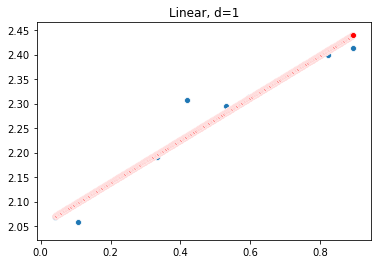

In [7]:
figures[0]

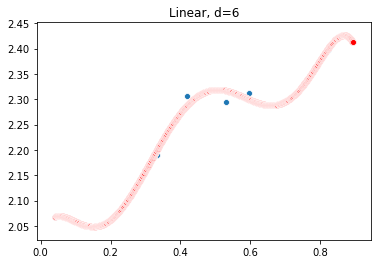

In [8]:
figures[-1]

In [9]:
model = Ridge(alpha=0.1)
prefix = f'Ridge'
figures = train_overfitted_model(x, y_train, model, prefix)

Coef (d=1): [0.37592542]
Coef (d=2): [0.29079085 0.10537417]
Coef (d=3): [ 0.29104745  0.10602958 -0.00113246]
Coef (d=4): [ 0.29269584  0.1163458   0.01311102 -0.03352819]
Coef (d=5): [ 0.292338    0.1234026   0.02395974 -0.0212824  -0.03966899]
Coef (d=6): [ 0.29129841  0.12748795  0.03092063 -0.01308833 -0.03116899 -0.03726313]


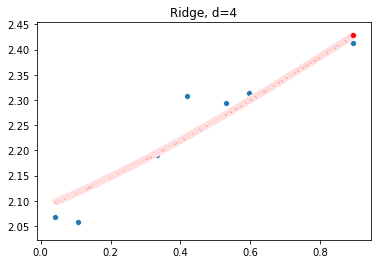

In [10]:
figures[3]

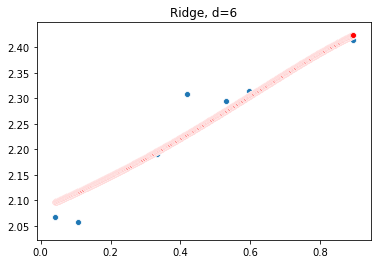

In [11]:
figures[-1]

In [12]:
model = SGDRegressor(alpha=0.00001, max_iter=1000, eta0=0.01)
prefix = f'SGD'
figures = train_overfitted_model(x, y_train, model, prefix)

Coef (d=1): [0.77210515]
Coef (d=2): [0.68688996 0.4202972 ]
Coef (d=3): [0.65324079 0.39005559 0.26573859]
Coef (d=4): [0.63497929 0.37274241 0.25018129 0.1821676 ]
Coef (d=5): [0.62077459 0.36163125 0.24161569 0.17535216 0.13476016]
Coef (d=6): [0.61740642 0.354891   0.23382207 0.16764363 0.12759124 0.10126141]


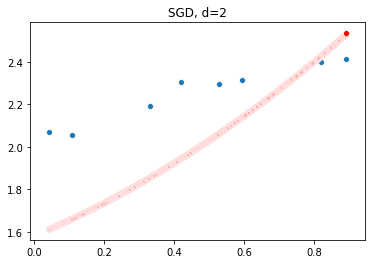

In [13]:
figures[1]